
# Import Libraries


In [25]:
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Loading



In [26]:
data = {
    "order_id": [1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012],
    "customer_id": ["C01","C02","C03","C01","C04","C05","C02","C03","C06","C04","C05","C01"],
    "customer_type": ["New","New","Returning","Returning","New","Returning",
                      "Returning","New","New","Returning","Returning","New"],
    "product_category": ["Electronics","Fashion","Electronics","Home","Fashion","Electronics",
                         "Home","Fashion","Electronics","Home","Fashion","Electronics"],
    "product": ["Laptop","Shirt","Mobile","Mixer","Shoes","Tablet",
                "Sofa","Jeans","Headphones","Dining Table","Jacket","Laptop"],
    "region": ["North","South","East","West","North","South",
               "East","West","North","South","East","West"],
    "units_sold": [1,3,2,1,2,1,1,4,2,1,np.nan,1],
    "price": [65000,1500,22000,8000,3000,28000,
              40000,2000,5000,45000,3500,67000],
    "discount_percent": [10,5,8,0,12,7,5,10,0,15,20,10],
    "order_date": pd.to_datetime([
        "2024-01-03","2024-01-05","2024-01-08","2024-01-10",
        "2024-01-12","2024-01-15","2024-01-18","2024-01-20",
        "2024-01-22","2024-01-25","2024-01-28","2024-02-01"
    ])
}

df = pd.DataFrame(data)
df.head() 


,order_id,customer_id,customer_type,product_category,product,region,units_sold,price,discount_percent,order_date
0,1001,C01,New,Electronics,Laptop,North,1.0,65000,10,2024-01-03
1,1002,C02,New,Fashion,Shirt,South,3.0,1500,5,2024-01-05
2,1003,C03,Returning,Electronics,Mobile,East,2.0,22000,8,2024-01-08
3,1004,C01,Returning,Home,Mixer,West,1.0,8000,0,2024-01-10
4,1005,C04,New,Fashion,Shoes,North,2.0,3000,12,2024-01-12


# Data Cleaning 

In [27]:
median_units_sold = df["units_sold"].median()
df["units_sold"] = df["units_sold"].fillna(median_units_sold)

# features engineering 

In [28]:
median_units_sold = df["units_sold"].median()
df["units_sold"] = df["units_sold"].fillna(median_units_sold)


# Revenue by Product Category

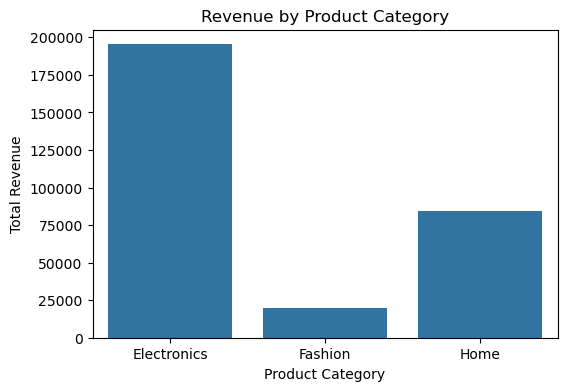

In [29]:

df["discount_amount"] = df["price"] * (df["discount_percent"] / 100)
df["final_price"] = df["price"] - df["discount_amount"]
df[["price", "discount_amount", "final_price"]].head()
df["revenue"] = df["units_sold"] * df["final_price"]

category_revenue = df.groupby("product_category")["revenue"].sum().reset_index()

plt.figure(figsize=(6,4))
df
sns.barplot(x="product_category", y="revenue", data=category_revenue)
plt.title("Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.show()


# Revenue by Customer Type


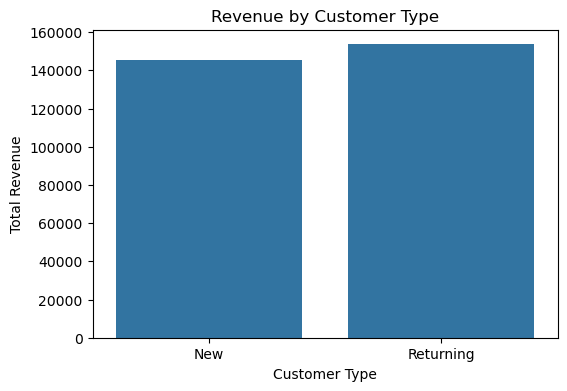

In [30]:
customer_revenue = df.groupby("customer_type")["revenue"].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x="customer_type", y="revenue", data=customer_revenue)
plt.title("Revenue by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Total Revenue")
plt.show()


# Discount vs Units Sold

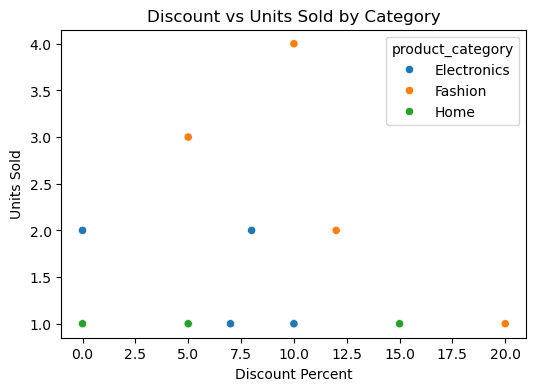

In [31]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="discount_percent",
    y="units_sold",
    hue="product_category",
    data=df
)
plt.title("Discount vs Units Sold by Category")
plt.xlabel("Discount Percent")
plt.ylabel("Units Sold")
plt.show()


# Region-wise Revenue

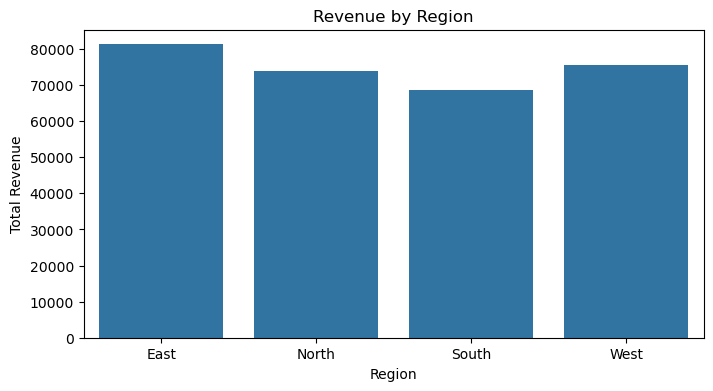

In [32]:
region_sales = df.groupby("region")["revenue"].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x="region", y="revenue", data=region_sales)
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.show()


# Revenue Trend Over Time 

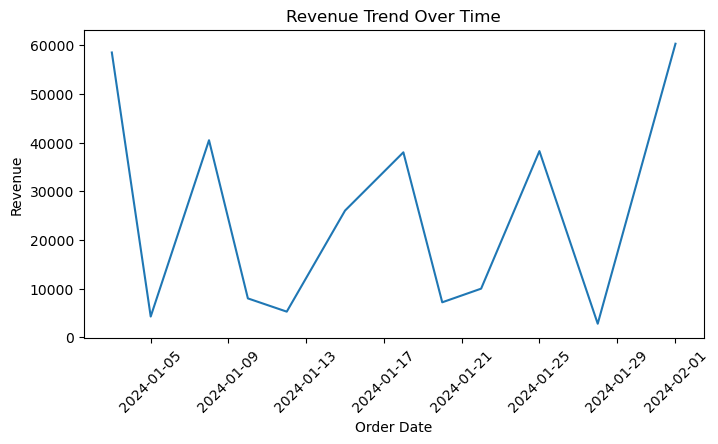

In [33]:
daily_revenue = df.groupby("order_date")["revenue"].sum().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(x="order_date", y="revenue", data=daily_revenue)
plt.title("Revenue Trend Over Time")
plt.xticks(rotation=45)
plt.xlabel("Order Date")
plt.ylabel("Revenue")
plt.show()